In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim 
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms

import json 
import numpy as np
from PIL import Image

In [3]:
vgg16 = models.vgg16(pretrained=True)

In [4]:
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])

<class 'PIL.Image.Image'>


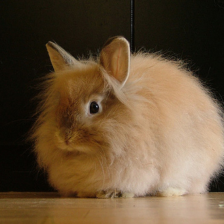

In [5]:
preprocess2 = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224)
])
img = Image.open('../data/20180212105211.png')
trans_img = preprocess2(img)
print(type(trans_img))
trans_img

In [6]:
img_tensor = preprocess(img)
img_tensor_1= img_tensor[0:3]
img_tensor_1.shape

torch.Size([3, 224, 224])

In [7]:
# 画像をモデルに入力する際に、先頭にバッチサイズの次元を追加する
img_tensor_1.unsqueeze_(0)
print(img_tensor_1.shape)

torch.Size([1, 3, 224, 224])


In [8]:
# モデルに入れるときは4DテンソルをVariableに変換する必要がある
out = vgg16(Variable(img_tensor_1))
print(out.size())
label = np.argmax(out.data.numpy())
print(label)

torch.Size([1, 1000])
332


In [9]:
out.topk(5)

(tensor([[ 31.4184,  19.8435,  19.1454,  18.5553,  18.1052]]),
 tensor([[ 332,  338,  283,  331,  333]]))

In [10]:
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

--2018-06-18 13:05:46--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
s3.amazonaws.com (s3.amazonaws.com) をDNSに問いあわせています... 52.216.20.157
s3.amazonaws.com (s3.amazonaws.com)|52.216.20.157|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 35363 (35K) [application/octet-stream]
`imagenet_class_index.json.1' に保存中

imagenet_class_inde 100%[===================>]  34.53K  58.0KB/s 時間 0.6s       

2018-06-18 13:05:47 (58.0 KB/s) - `imagenet_class_index.json.1' へ保存完了 [35363/35363]



In [11]:
class_index = json.load(open('imagenet_class_index.json', 'r'))
print(class_index)

{'848': ['n04392985', 'tape_player'], '224': ['n02105056', 'groenendael'], '27': ['n01631663', 'eft'], '363': ['n02454379', 'armadillo'], '832': ['n04346328', 'stupa'], '693': ['n03873416', 'paddle'], '851': ['n04404412', 'television'], '9': ['n01518878', 'ostrich'], '462': ['n02906734', 'broom'], '366': ['n02480855', 'gorilla'], '676': ['n03803284', 'muzzle'], '172': ['n02091134', 'whippet'], '586': ['n03478589', 'half_track'], '710': ['n03908714', 'pencil_sharpener'], '127': ['n02002556', 'white_stork'], '199': ['n02097298', 'Scotch_terrier'], '336': ['n02361337', 'marmot'], '720': ['n03937543', 'pill_bottle'], '615': ['n03623198', 'knee_pad'], '410': ['n02727426', 'apiary'], '220': ['n02102480', 'Sussex_spaniel'], '568': ['n03404251', 'fur_coat'], '429': ['n02799071', 'baseball'], '121': ['n01981276', 'king_crab'], '547': ['n03272562', 'electric_locomotive'], '537': ['n03218198', 'dogsled'], '489': ['n03000134', 'chainlink_fence'], '145': ['n02056570', 'king_penguin'], '994': ['n130

In [12]:
labels = {int(key):value for (key, value) in class_index.items()}

In [13]:
print(labels[np.argmax(out.data.numpy())])

['n02328150', 'Angora']


In [14]:
def predict(image_file):
    img = Image.open(image_file)
    img_tensor = preprocess(img)
    img_tensor_1 = img_tensor[0:3]
    img_tensor_1.unsqueeze_(0)
    
    out = vgg16(Variable(img_tensor_1))
    
    # 出力を確率にする
    out = nn.functional.softmax(out, dim=1)
    out = out.data.numpy()
    
    maxid = np.argmax(out)
    maxprob = np.max(out)
    label = labels[maxid]
    return img, label, maxprob

In [17]:
img, label, prob = predict('../data/iphonex-screenshot.jpg')
print(label, prob)

['n04074963', 'remote_control'] 0.7305054
